In [1]:
import os
import joblib
import pickle as pkl

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
#plt.style.use('seaborn-whitegrid')
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [2]:
hawks_knn_search = joblib.load('gridsearch_cv/hawks_rv_knn.pkl')
hawks_rf_search = joblib.load('gridsearch_cv/hawks_rv_rf.pkl')
hawks_svm_search = joblib.load('gridsearch_cv/hawks_rv_svm.pkl')

congresional_knn_search = joblib.load('gridsearch_cv/congresional_rv_knn.pkl')
congresional_rf_search = joblib.load('gridsearch_cv/congresional_rv_rf.pkl')
congresional_svm_search = joblib.load('gridsearch_cv/congresional_rv_svm.pkl')

location_knn_search = joblib.load('gridsearch_cv/location_rv_knn.pkl')
location_rf_search = joblib.load('gridsearch_cv/location_rv_rf.pkl')
location_svm_search = joblib.load('gridsearch_cv/location_rv_svm.pkl')

bankruptcy_knn_search = joblib.load('gridsearch_cv/bankruptcy_rv_knn.pkl')
bankruptcy_rf_search = joblib.load('gridsearch_cv/bankruptcy_rv_rf.pkl')
bankruptcy_svm_search = joblib.load('gridsearch_cv/bankruptcy_rv_svm.pkl')

C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\sass9\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.1 when using version 0.24.2. This might lead to breaking code or 

In [3]:
def get_results_in_df(search):
    results_df = pd.DataFrame(search.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index(
        results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
    ).rename_axis("model")
    relevant_cols = [col for col in results_df.columns if "param_" in col] + ["mean_test_score", "std_test_score", "rank_test_score"]
    return results_df[relevant_cols]

## Hawks

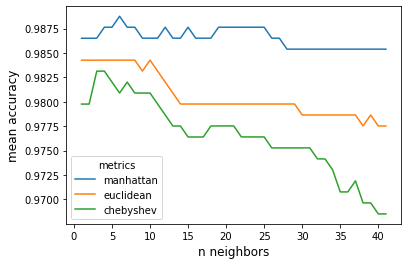

In [4]:
hawks_knn = get_results_in_df(hawks_knn_search)
hawks_knn = hawks_knn.loc[(hawks_knn["param_algorithm"]=="auto") & 
                          (hawks_knn["param_weights"]=="distance") &
                          (hawks_knn["param_metric"]!="minkowski")]
sns.lineplot(data=hawks_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', markers= ["o"])
plt.xlabel("n neighbors", fontsize= 12)
plt.ylabel("mean accuracy", fontsize= 12)
plt.legend(title="metrics")

In [5]:
hawks_rf = get_results_in_df(hawks_rf_search)
hawks_rf = hawks_rf.loc[(hawks_rf["param_criterion"]=="gini")]
hawks_rf.head(5)

param_criterion param_max_depth param_n_estimators  \
model                                                             
gini_50_25              gini              50                 25   
gini_25_100             gini              25                100   
gini_50_100             gini              50                100   
gini_75_225             gini              75                225   
gini_200_225            gini             200                225   

              mean_test_score  std_test_score  rank_test_score  
model                                                           
gini_50_25           0.986517        0.018667                1  
gini_25_100          0.986517        0.018667                1  
gini_50_100          0.986517        0.018667                1  
gini_75_225          0.986517        0.018667                1  
gini_200_225         0.986517        0.018667                1

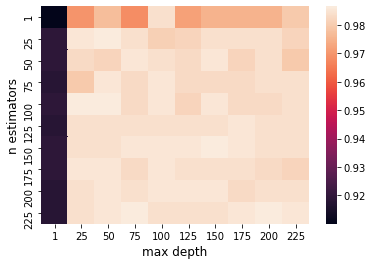

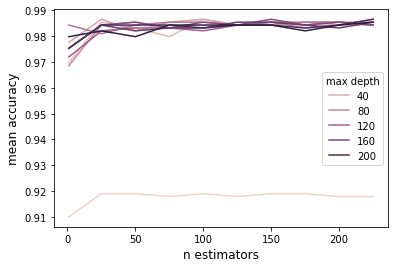

In [6]:
hawks_rf_hm = hawks_rf.pivot("param_n_estimators", "param_max_depth", "mean_test_score")
sns.heatmap(hawks_rf_hm)
plt.xlabel("max depth", fontsize= 12)
plt.ylabel("n estimators", fontsize= 12)
plt.show()

sns.lineplot(data=hawks_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', markers= ["o"])
plt.xlabel("n estimators", fontsize= 12)
plt.ylabel("mean accuracy", fontsize= 12)
plt.legend(title="max depth")

In [7]:
hawks_svm = get_results_in_df(hawks_svm_search)
hawks_svm.head(5)

param_C param_kernel  mean_test_score  std_test_score  rank_test_score
model                                                                         
3_rbf         3          rbf         0.985393        0.018667                1
5_rbf         5          rbf         0.985393        0.018667                1
0.8_rbf     0.8          rbf         0.985393        0.018667                1
4_rbf         4          rbf         0.985393        0.018667                1
8_rbf         8          rbf         0.985393        0.018667                1

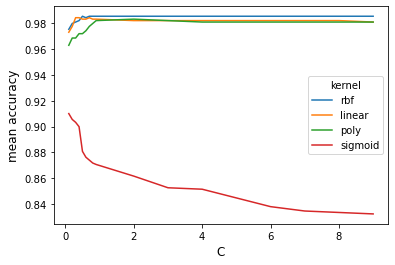

In [8]:
sns.lineplot(data=hawks_svm, x='param_C', y='mean_test_score', hue='param_kernel', markers= ["o"])
plt.xlabel("C", fontsize= 12)
plt.ylabel("mean accuracy", fontsize= 12)
plt.legend(title="kernel")

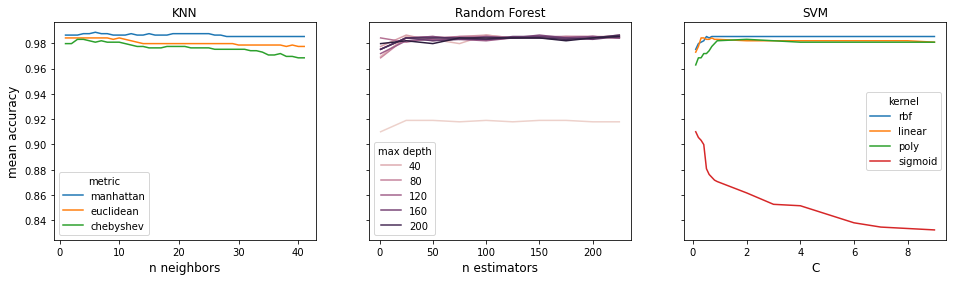

In [10]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
#plt.ylabel("mean accuracy", fontsize= 12)

sns.lineplot(data=hawks_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', ax=axs[0])
axs[0].set_title("KNN", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].set_xlabel("n neighbors", fontsize= 12)
axs[0].legend(title="metric")

sns.lineplot(data=hawks_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[1])
axs[1].set_title("Random Forest", fontsize= 12)
axs[1].set_xlabel("n estimators", fontsize= 12)
axs[1].legend(title="max depth")

sns.lineplot(data=hawks_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[2])
axs[2].set_title("SVM", fontsize= 12)
axs[2].set_xlabel("C", fontsize= 12)
axs[2].legend(title="kernel")

plt.savefig("hyperparam_plots/hawks_performances.png")

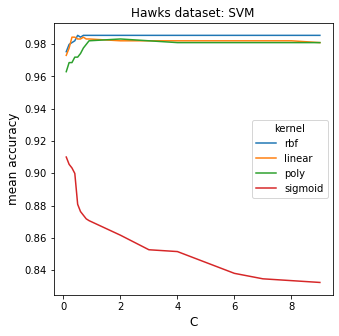

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(data=hawks_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs)
axs.set_ylabel("mean accuracy", fontsize= 12)
axs.set_title("Hawks dataset: SVM", fontsize= 12)
axs.set_xlabel("C", fontsize= 12)
axs.legend(title="kernel")

plt.savefig("hyperparam_plots/hawks_svm_performances.png", dpi=300)

## Voting

In [11]:
congresional_knn = get_results_in_df(congresional_knn_search)
congresional_knn = congresional_knn.loc[(congresional_knn["param_algorithm"]=="auto") &
                                        (congresional_knn["param_weights"]=="distance") &
                                        (congresional_knn["param_metric"]!="minkowski")]

congresional_rf = get_results_in_df(congresional_rf_search)
congresional_rf = congresional_rf.loc[(congresional_rf["param_criterion"]=="gini")]

congresional_svm = get_results_in_df(congresional_svm_search)

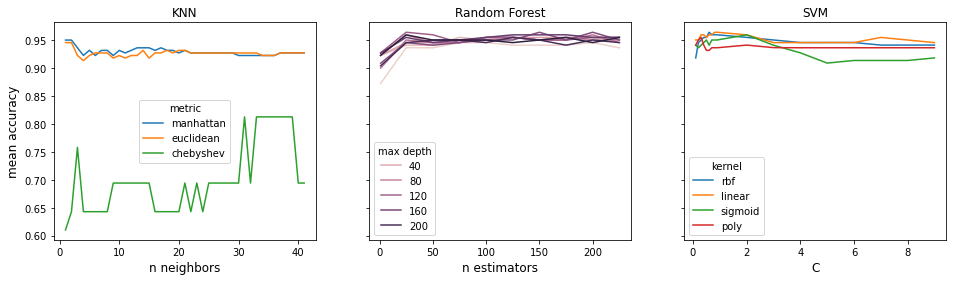

In [12]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
#plt.ylabel("mean accuracy", fontsize= 12)

sns.lineplot(data=congresional_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', ax=axs[0])
axs[0].set_title("KNN", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].set_xlabel("n neighbors", fontsize= 12)
axs[0].legend(title="metric")

sns.lineplot(data=congresional_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[1])
axs[1].set_title("Random Forest", fontsize= 12)
axs[1].set_xlabel("n estimators", fontsize= 12)
axs[1].legend(title="max depth")

sns.lineplot(data=congresional_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[2])
axs[2].set_title("SVM", fontsize= 12)
axs[2].set_xlabel("C", fontsize= 12)
axs[2].legend(title="kernel")

plt.savefig("hyperparam_plots/voting_performances.png")

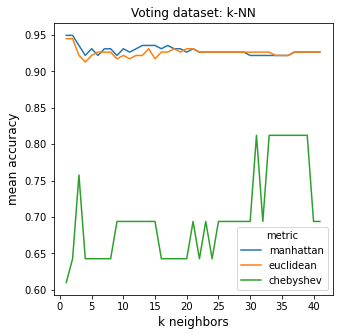

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(data=congresional_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', ax=axs)
axs.set_ylabel("mean accuracy", fontsize= 12)
axs.set_title("Voting dataset: k-NN", fontsize= 12)
axs.set_xlabel("k neighbors", fontsize= 12)
axs.legend(title="metric")

plt.savefig("hyperparam_plots/voting_knn_performances.png", dpi=300)

## Bankruptcy

In [13]:
bankruptcy_knn = get_results_in_df(bankruptcy_knn_search)
bankruptcy_knn = bankruptcy_knn.loc[(bankruptcy_knn["param_weights"]=="distance")]

bankruptcy_rf = get_results_in_df(bankruptcy_rf_search)
bankruptcy_rf = bankruptcy_rf.loc[(bankruptcy_rf["param_criterion"]=="gini")].sort_values(by=['param_max_depth'])

bankruptcy_svm = get_results_in_df(bankruptcy_svm_search)

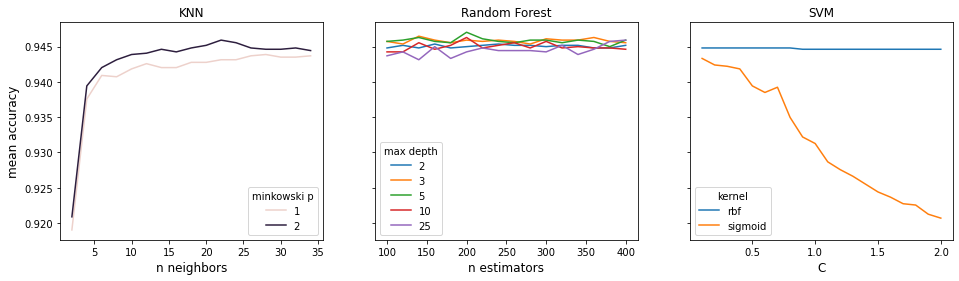

In [14]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))
#plt.ylabel("mean accuracy", fontsize= 12)

sns.lineplot(data=bankruptcy_knn, x='param_n_neighbors', y='mean_test_score', hue='param_p', ax=axs[0])
axs[0].set_title("KNN", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].set_xlabel("n neighbors", fontsize= 12)
axs[0].legend(title="minkowski p")

sns.lineplot(data=bankruptcy_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[1])
axs[1].set_title("Random Forest", fontsize= 12)
axs[1].set_xlabel("n estimators", fontsize= 12)
axs[1].legend(title="max depth")

sns.lineplot(data=bankruptcy_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[2])
axs[2].set_title("SVM", fontsize= 12)
axs[2].set_xlabel("C", fontsize= 12)
axs[2].legend(title="kernel")

plt.savefig("hyperparam_plots/bankruptcy_performances.png")

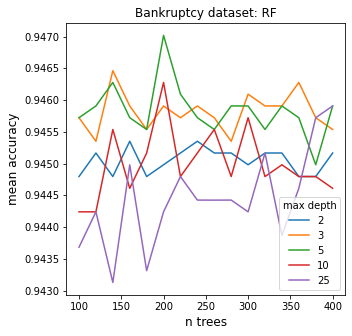

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(data=bankruptcy_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs)
axs.set_ylabel("mean accuracy", fontsize= 12)
axs.set_title("Bankruptcy dataset: RF", fontsize= 12)
axs.set_xlabel("n trees", fontsize= 12)
axs.legend(title="max depth")

plt.savefig("hyperparam_plots/bankruptcy_rf_performances.png", dpi=300)

## Location

In [15]:
location_knn = get_results_in_df(location_knn_search)

location_rf = get_results_in_df(location_rf_search)
location_rf = location_rf.sort_values(by=['param_rf__max_depth'])
location_rf["param_rf__max_depth"].fillna(value="inf", inplace=True)

location_svm = get_results_in_df(location_svm_search)

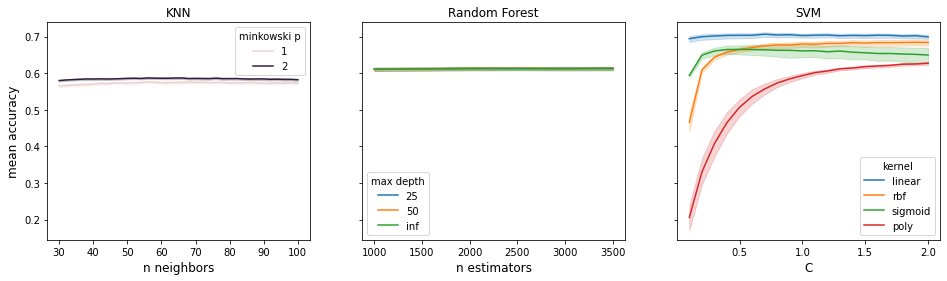

In [16]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 4))

sns.lineplot(data=location_knn, x='param_knn__n_neighbors', y='mean_test_score', hue='param_knn__p', ax=axs[0])
axs[0].set_title("KNN", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].set_xlabel("n neighbors", fontsize= 12)
axs[0].legend(title="minkowski p")

sns.lineplot(data=location_rf, x='param_rf__n_estimators', y='mean_test_score', hue='param_rf__max_depth', ax=axs[1])
axs[1].set_title("Random Forest", fontsize= 12)
axs[1].set_xlabel("n estimators", fontsize= 12)
axs[1].legend(title="max depth")

sns.lineplot(data=location_svm, x='param_svm__C', y='mean_test_score', hue='param_svm__kernel', ax=axs[2])
axs[2].set_title("SVM", fontsize= 12)
axs[2].set_xlabel("C", fontsize= 12)
axs[2].legend(title="kernel")

plt.savefig("hyperparam_plots/location_performances.png")

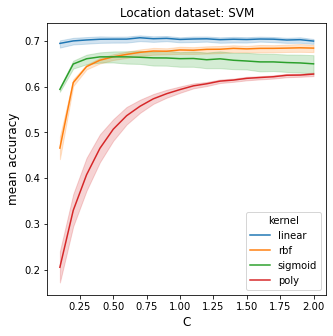

In [26]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

sns.lineplot(data=location_svm, x='param_svm__C', y='mean_test_score', hue='param_svm__kernel', ax=axs)
axs.set_ylabel("mean accuracy", fontsize= 12)
axs.set_title("Location dataset: SVM", fontsize= 12)
axs.set_xlabel("C", fontsize= 12)
axs.legend(title="kernel")

plt.savefig("hyperparam_plots/location_svm_performances.png", dpi=300)

## Comparison across Datasets

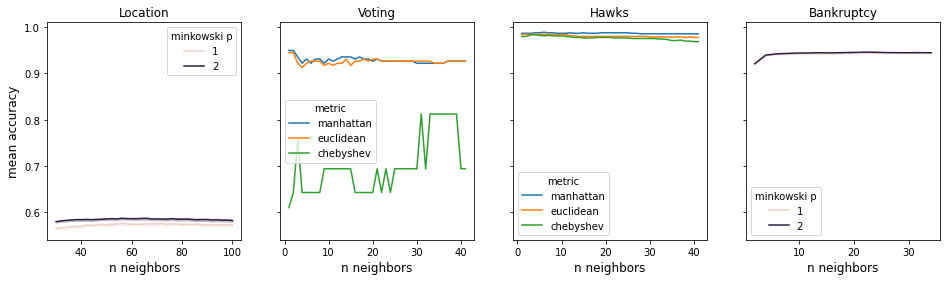

In [17]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4))

sns.lineplot(data=location_knn, x='param_knn__n_neighbors', y='mean_test_score', hue='param_knn__p', ax=axs[0])
axs[0].set_title("Location", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].set_xlabel("n neighbors", fontsize= 12)
axs[0].legend(title="minkowski p")

sns.lineplot(data=congresional_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', ax=axs[1])
axs[1].set_title("Voting", fontsize= 12)
axs[1].set_xlabel("n neighbors", fontsize= 12)
axs[1].legend(title="metric")

sns.lineplot(data=hawks_knn, x='param_n_neighbors', y='mean_test_score', hue='param_metric', ax=axs[2])
axs[2].set_title("Hawks", fontsize= 12)
axs[2].set_xlabel("n neighbors", fontsize= 12)
axs[2].legend(title="metric")

sns.lineplot(data=bankruptcy_knn, x='param_n_neighbors', y='mean_test_score', hue='param_p', ax=axs[3])
axs[3].set_title("Bankruptcy", fontsize= 12)
axs[3].set_xlabel("n neighbors", fontsize= 12)
axs[3].legend(title="minkowski p")

plt.savefig("hyperparam_plots/knn_performances.png")

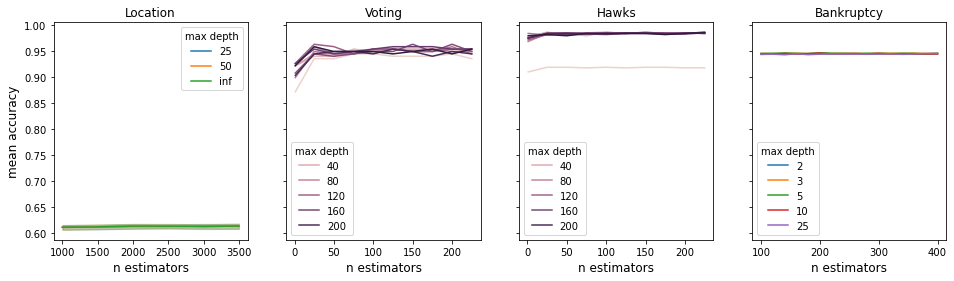

In [18]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4))

sns.lineplot(data=location_rf, x='param_rf__n_estimators', y='mean_test_score', hue='param_rf__max_depth', ax=axs[0])
axs[0].set_title("Location", fontsize= 12)
axs[0].set_xlabel("n estimators", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].legend(title="max depth")

sns.lineplot(data=congresional_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[1])
axs[1].set_title("Voting", fontsize= 12)
axs[1].set_xlabel("n estimators", fontsize= 12)
axs[1].legend(title="max depth")

sns.lineplot(data=hawks_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[2])
axs[2].set_title("Hawks", fontsize= 12)
axs[2].set_xlabel("n estimators", fontsize= 12)
axs[2].legend(title="max depth")

sns.lineplot(data=bankruptcy_rf, x='param_n_estimators', y='mean_test_score', hue='param_max_depth', ax=axs[3])
axs[3].set_title("Bankruptcy", fontsize= 12)
axs[3].set_xlabel("n estimators", fontsize= 12)
axs[3].legend(title="max depth")

plt.savefig("hyperparam_plots/rf_performances.png")

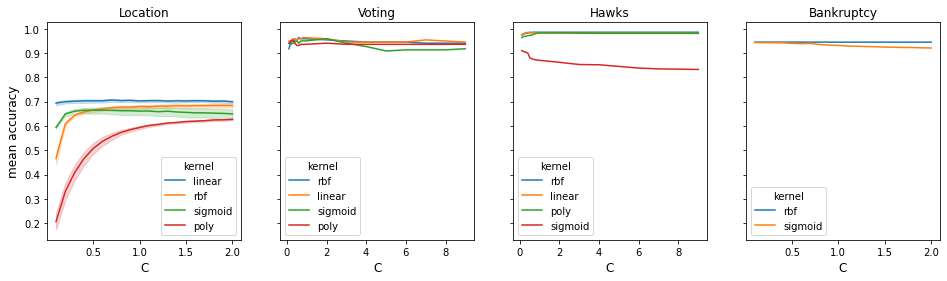

In [19]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16, 4))

sns.lineplot(data=location_svm, x='param_svm__C', y='mean_test_score', hue='param_svm__kernel', ax=axs[0])
axs[0].set_title("Location", fontsize= 12)
axs[0].set_xlabel("C", fontsize= 12)
axs[0].set_ylabel("mean accuracy", fontsize= 12)
axs[0].legend(title="kernel")

sns.lineplot(data=congresional_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[1])
axs[1].set_title("Voting", fontsize= 12)
axs[1].set_xlabel("C", fontsize= 12)
axs[1].legend(title="kernel")

sns.lineplot(data=hawks_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[2])
axs[2].set_title("Hawks", fontsize= 12)
axs[2].set_xlabel("C", fontsize= 12)
axs[2].legend(title="kernel")

sns.lineplot(data=bankruptcy_svm, x='param_C', y='mean_test_score', hue='param_kernel', ax=axs[3])
axs[3].set_title("Bankruptcy", fontsize= 12)
axs[3].set_xlabel("C", fontsize= 12)
axs[3].legend(title="kernel")

plt.savefig("hyperparam_plots/svm_performances.png")